#### Project Plan 
* 1. Get the data
* 2. Clean the data
* 3. Exploratory data analysis
* 4. Feature engineering
* 5. Preprocessing
* 6. Modelling
* 7. Hyperparameter tuning
* 8. Perfomance evaluation



### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stats
import wolta

### Dataset source:

In [2]:
# https://archive.ics.uci.edu/dataset/186/wine+quality

### Data descriptions

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
<br>Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks.  The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection
<br>algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

## Potential Project Goals
## 1) use regression to predict quality of red wine based on smell - can be applied in real world with a device that can analyze and/or rate wines without consumption

### Volatile acidity – contributes to the aroma of wine, as it involves acetic acid.
### Alcohol – influences the perception of aromas by enhancing volatility.
### Sulphates – impact the <b><u>freshness</u></b> of aromas and can affect smell.
### Citric acid – contributes to freshness, which can influence the perception of fruit-related aromas.
### Residual sugar – though more about taste, it can enhance the perception of fruity or floral aromas by increasing the overall sensory experience.

In [12]:
df=pd.read_csv('winequality-red.csv', sep=r';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Focus on the 5 attributes related to aroma, and the quality score:

In [26]:
# Volatile Acidity
df['volatile acidity'].describe().to_frame().T.round(6)

,count,mean,std,min,25%,50%,75%,max
volatile acidity,1599.0,0.527821,0.17906,0.12,0.39,0.52,0.64,1.58


In [16]:
# Sulphates
df['sulphates'].describe().to_frame().T.round(6)

,count,mean,std,min,25%,50%,75%,max
sulphates,1599.0,0.658149,0.169507,0.33,0.55,0.62,0.73,2.0


In [17]:
# Alcohol
df['alcohol'].describe().to_frame().T.round(6)

,count,mean,std,min,25%,50%,75%,max
alcohol,1599.0,10.422983,1.065668,8.4,9.5,10.2,11.1,14.9


In [18]:
# Citric Acid
df['citric acid'].describe().to_frame().T.round(6)

,count,mean,std,min,25%,50%,75%,max
citric acid,1599.0,0.270976,0.194801,0.0,0.09,0.26,0.42,1.0


In [19]:
# Residual Sugar
df['residual sugar'].describe().to_frame().T.round(6)

,count,mean,std,min,25%,50%,75%,max
residual sugar,1599.0,2.538806,1.409928,0.9,1.9,2.2,2.6,15.5


In [20]:
# Quality
df['quality'].describe().to_frame().T.round(6)

,count,mean,std,min,25%,50%,75%,max
quality,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0


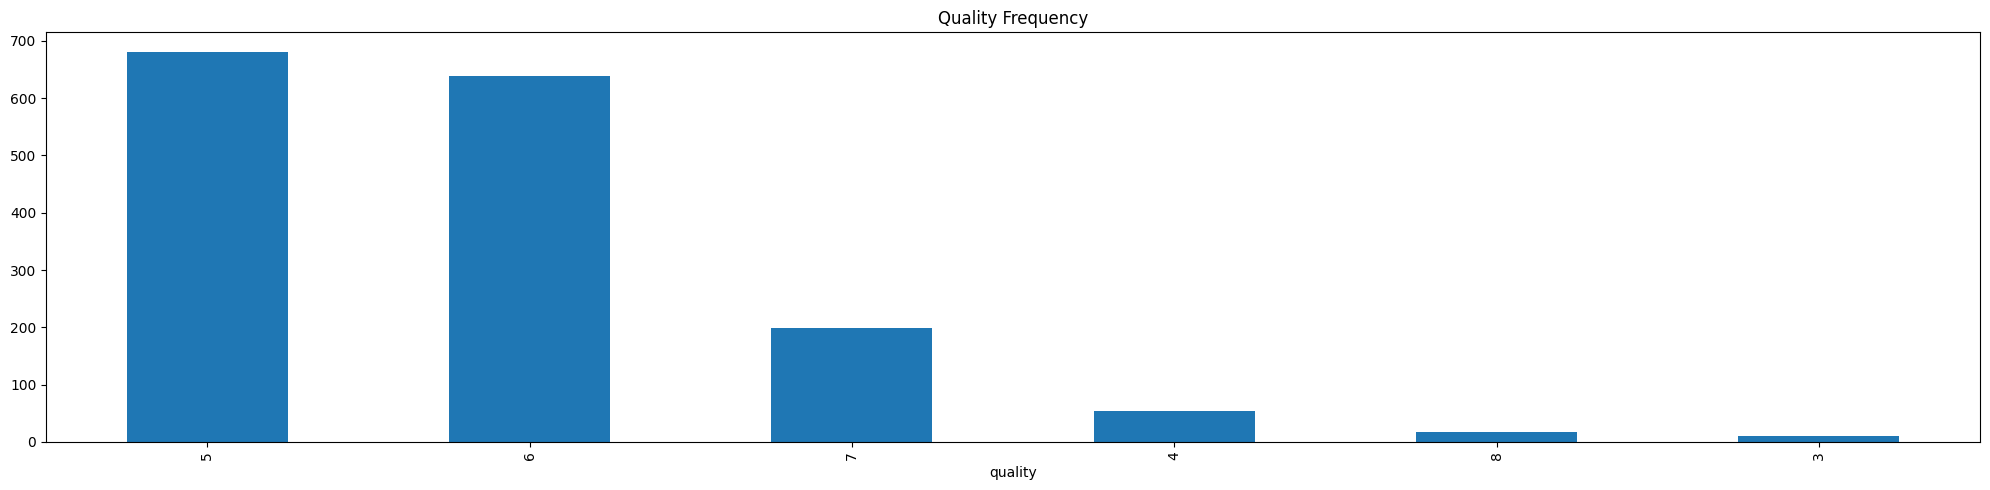

In [27]:
plt.figure(figsize=(20,5))
plt.title('Quality Frequency', )
df['quality'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.tight_layout()
plt.show()

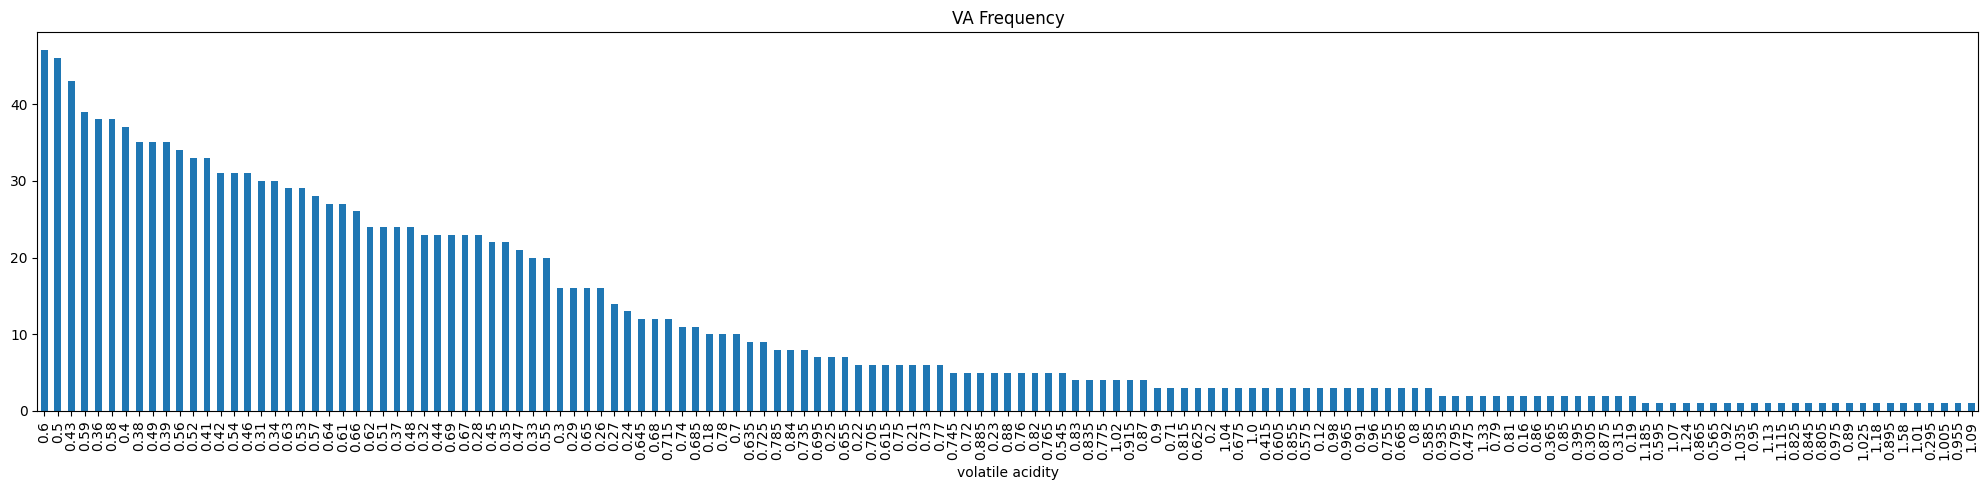

In [28]:
plt.figure(figsize=(20,5))
plt.title('VA Frequency', )
df['volatile acidity'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.tight_layout()
plt.show()

valu overlays

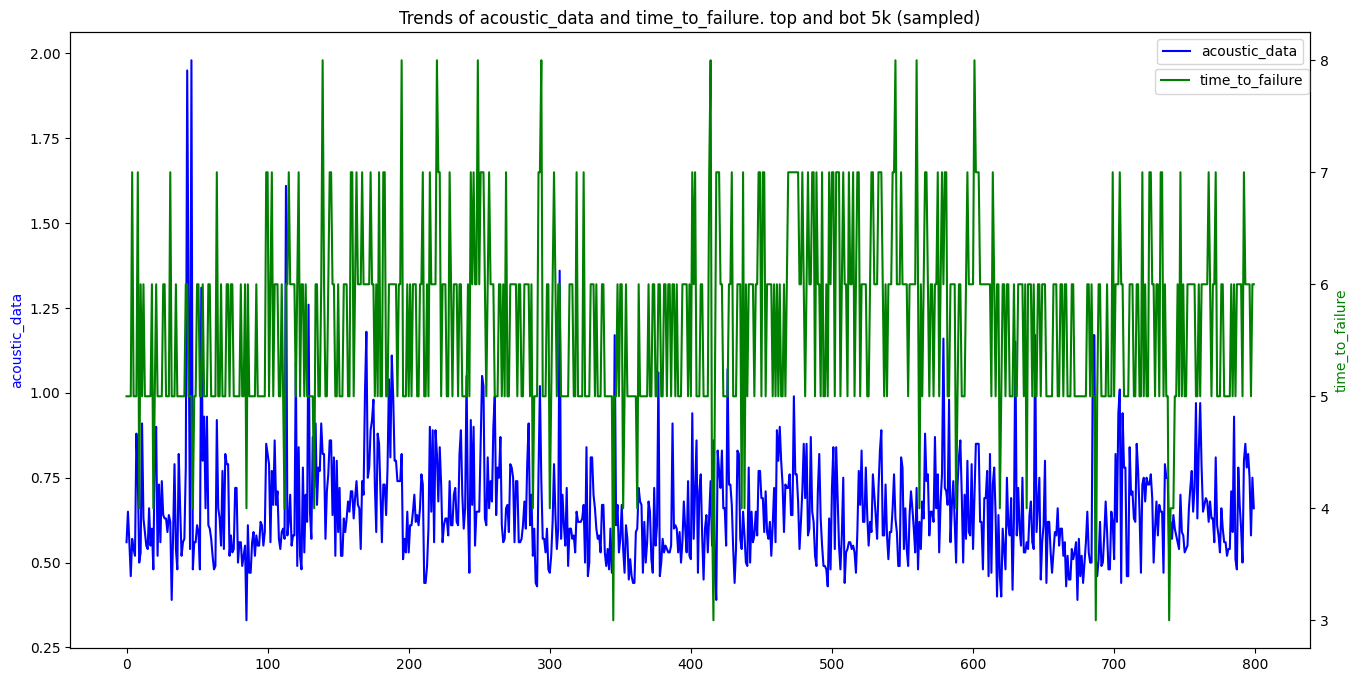

In [36]:
one = df['sulphates'].values[::2]
two = df['residual sugar']
three = df['citric acid']
four = df['alcohol']
five = df['volatile acidity'].values[::]
quality = df['quality'].values[::2]

fig, ax1 = plt.subplots(figsize=(16, 8))
plt.title("Trends of acoustic_data and time_to_failure. top and bot 5k (sampled)")
plt.plot(one, color='b')
ax1.set_ylabel('acoustic_data', color='b')
plt.legend(['acoustic_data'])
ax2 = ax1.twinx()
plt.plot(quality, color='g')
ax2.set_ylabel('time_to_failure', color='g')
plt.legend(['time_to_failure'], loc=(0.875, 0.9))
plt.grid(False)

del one
del quality

In [38]:
df['quality'].sort_values(ascending=False).head()

495     8
1403    8
390     8
1061    8
1202    8
Name: quality, dtype: int64

In [39]:
df['volatile acidity'].sort_values(ascending=False).tail()

1566    0.16
1286    0.16
950     0.12
949     0.12
948     0.12
Name: volatile acidity, dtype: float64

In [40]:
# missing values
df.isnull().describe().T

,count,unique,top,freq
fixed acidity,1599,1,False,1599
volatile acidity,1599,1,False,1599
citric acid,1599,1,False,1599
residual sugar,1599,1,False,1599
chlorides,1599,1,False,1599
free sulfur dioxide,1599,1,False,1599
total sulfur dioxide,1599,1,False,1599
density,1599,1,False,1599
pH,1599,1,False,1599
sulphates,1599,1,False,1599


In [41]:
wolta.data_tools.col_types(df)

['float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'float64',
 'int64']

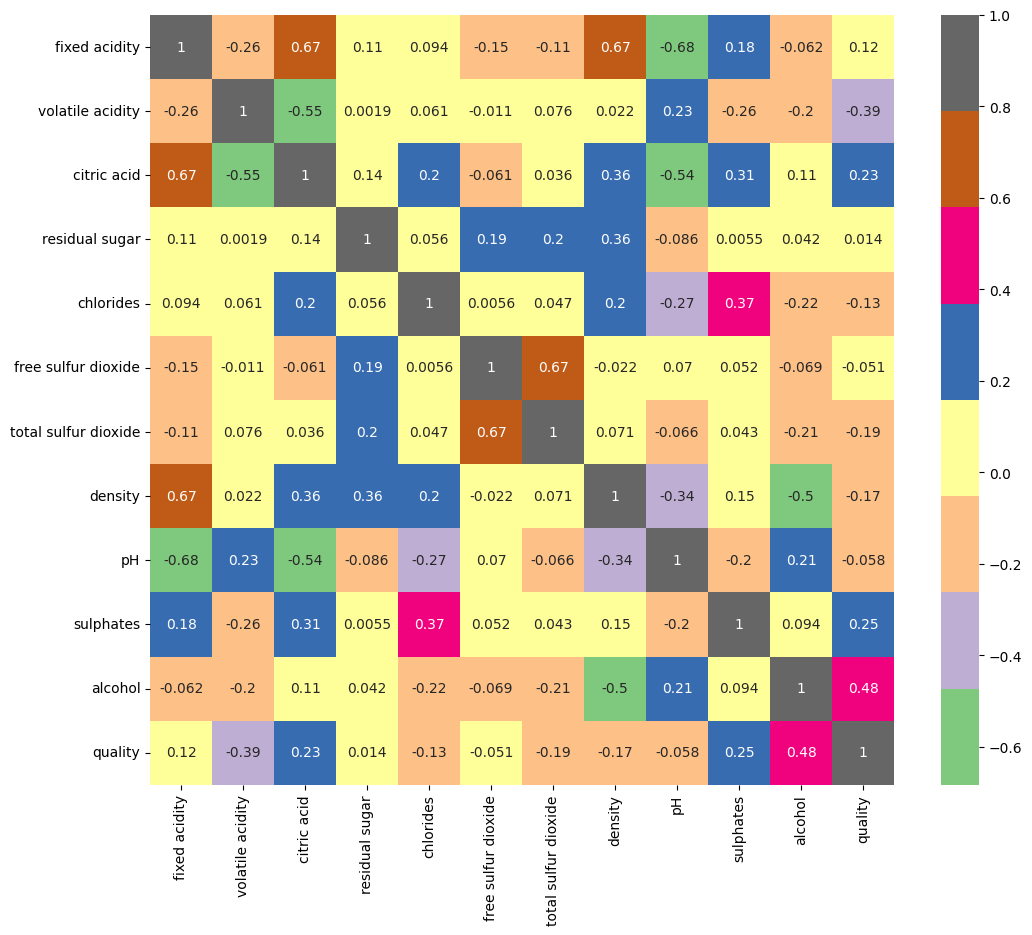

In [42]:
# pearson correlation
df.corr(method='pearson')
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Accent)
plt.show()

# alcohol, sulfates, citric acid = best correlation to quality from aroma characterists

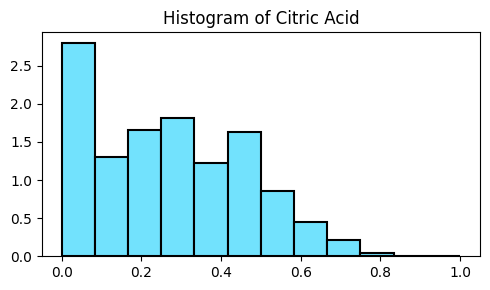

In [70]:
plt.figure(figsize=(5,3))
plt.hist(
    df['citric acid'],
    density=True,
    bins=12,
    edgecolor='black',
    linewidth=1.5,
    color='#72e2fd'
)

plt.title('Histogram of Citric Acid')
plt.tight_layout()
plt.show()

Correlation: 0.47616632400113607


<Figure size 700x600 with 0 Axes>

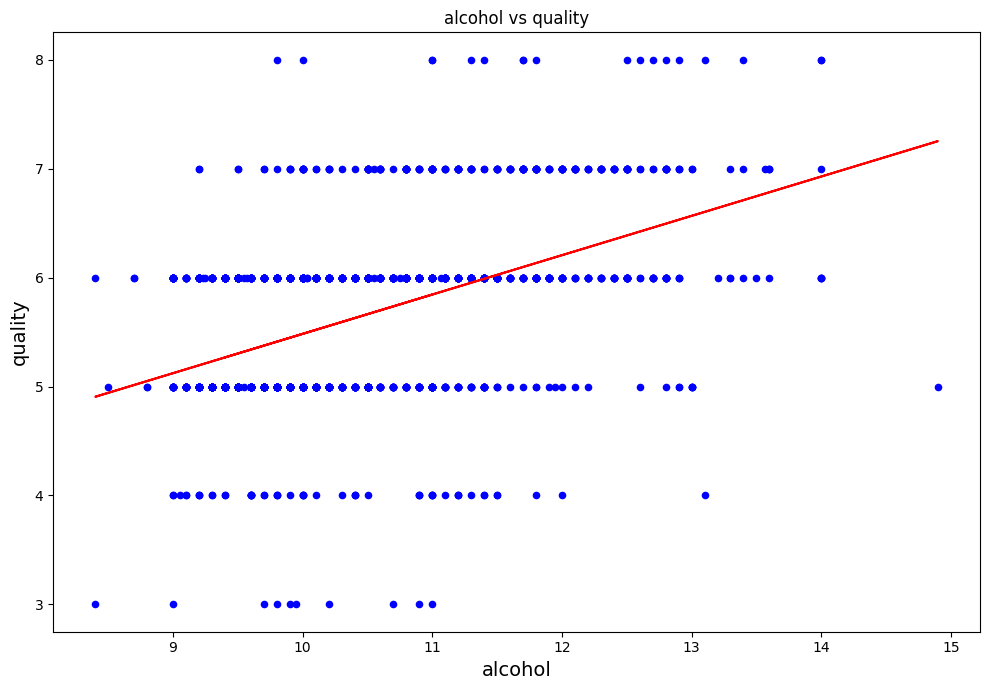

In [74]:
#alcoohol
x_name = 'alcohol'
y_name = 'quality'

plt.figure(figsize=(7,6))
x = df[x_name]
y = df[y_name]
df.plot(kind='scatter', x=x_name, y=y_name, color='blue', figsize=(10, 7))

# Fit a linear regression line (y = mx + b)
m, b = np.polyfit(x, y, 1)
# Generate the line for plotting
plt.plot(x, m*x + b, color='red', label=f'Correlation line: y = {m:.2f}x + {b:.2f}')
# Calculate correlation
correlation = np.corrcoef(x, y)[0, 1]
print(f'Correlation: {correlation}')

# scatterplot
# Labels and plot
plt.xlabel(x_name, size=14)
plt.ylabel(y_name, size=14)
plt.title(f'{x_name} vs {y_name}')
plt.tight_layout()
plt.show()

Correlation: 0.22637251431804153


<Figure size 700x600 with 0 Axes>

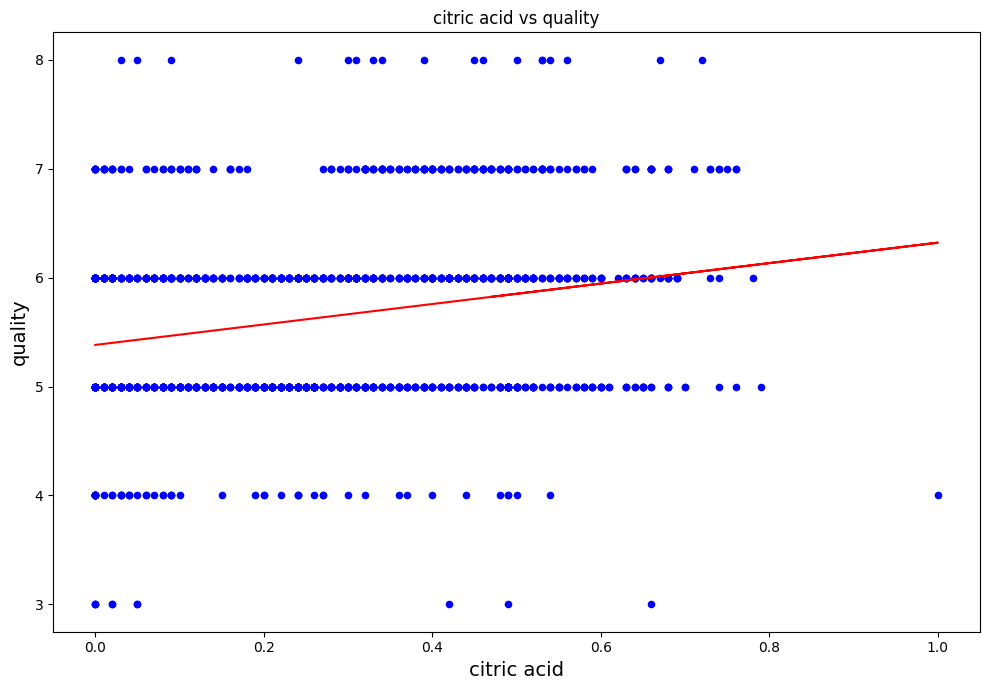

In [73]:
#citric acid
x_name = 'citric acid'
y_name = 'quality'

plt.figure(figsize=(7,6))
x = df[x_name]
y = df[y_name]
df.plot(kind='scatter', x=x_name, y=y_name, color='blue', figsize=(10, 7))

# Fit a linear regression line (y = mx + b)
m, b = np.polyfit(x, y, 1)
# Generate the line for plotting
plt.plot(x, m*x + b, color='red', label=f'Correlation line: y = {m:.2f}x + {b:.2f}')
# Calculate correlation
correlation = np.corrcoef(x, y)[0, 1]
print(f'Correlation: {correlation}')

# scatterplot
# Labels and plot
plt.xlabel(x_name, size=14)
plt.ylabel(y_name, size=14)
plt.title(f'{x_name} vs {y_name}')
plt.tight_layout()
plt.show()

Correlation: 0.2513970790692614


<Figure size 700x600 with 0 Axes>

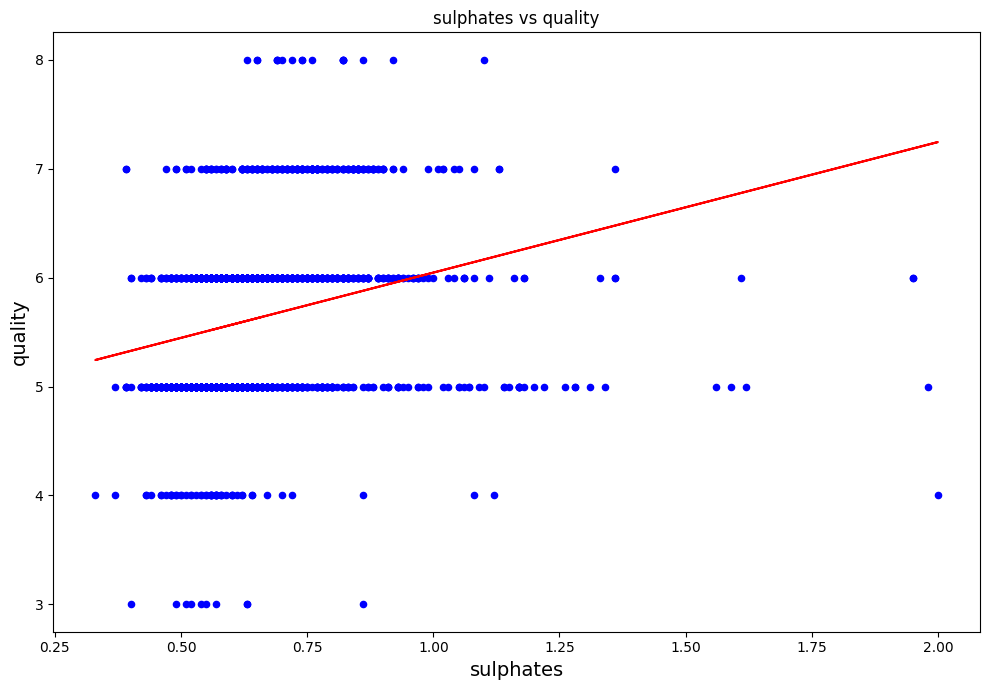

In [72]:
# Sulfates
x_name = 'sulphates'
y_name = 'quality'

plt.figure(figsize=(7,6))
x = df[x_name]
y = df[y_name]
df.plot(kind='scatter', x=x_name, y=y_name, color='blue', figsize=(10, 7))

# Fit a linear regression line (y = mx + b)
m, b = np.polyfit(x, y, 1)
# Generate the line for plotting
plt.plot(x, m*x + b, color='red', label=f'Correlation line: y = {m:.2f}x + {b:.2f}')
# Calculate correlation
correlation = np.corrcoef(x, y)[0, 1]
print(f'Correlation: {correlation}')

# scatterplot
# Labels and plot
plt.xlabel(x_name, size=14)
plt.ylabel(y_name, size=14)
plt.title(f'{x_name} vs {y_name}')
plt.tight_layout()
plt.show()

### Higher time until earthquake = -100 to 100 range with acoustic data
### Least time until earthquake = -25 to 25 acoustic data

In [22]:
range10k = 1.4691 - 1.466998
print(f'Acoustic Data range: {range10k:.5f} seconds')

Acoustic Data range: 0.00210 seconds


### That is a very small range for this 10k sample.

In [23]:
mil_range = 1.469099983 - 1.19779548
print(f'1 million row acoustic data range: {mil_range:.5f} seconds')

1 million row acoustic data range: 0.27130 seconds


### WIP:
### 1) full range of file is much better, need to random sample from 1,048,576 rows to get 10k rows or less
### 2) separate into groups based upon correlation
### 3) retest correlation